# <b>1 <span style='color:#fff700ba'>|</span> Introduction</b>
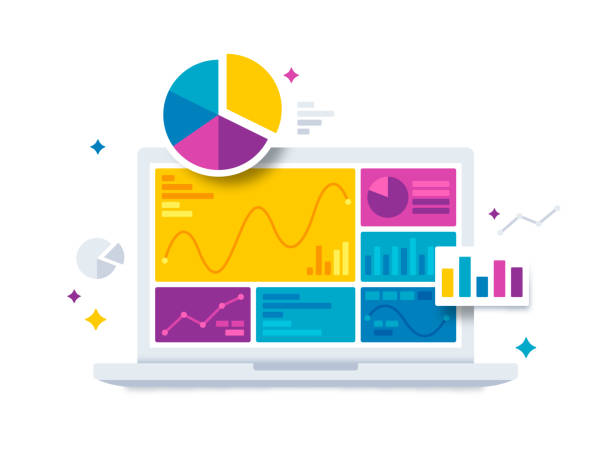


## <b><span style='color:#666'>Objective</span></b>

- I will discover the data in search of patterns that help us understand our customers and divide them into categories that are easy to deal with. The benefit of the customer segment makes it easier for us to target our customers and understand them correctly.

- Implement the mathmatical equations to build KMeans manually without using scikit-learn model..

## <b><span style='color:#666'>Models Used</span></b>
1. KMeans

## <b><span style='color:#666'>Steps followed </span></b>
1. Scale the data
2. Initialize random centroids
3. Label each data point
4. Update centroids
5. Repeat steps 3, 4 until centroids stop changing


#### <center>💡 For a better understanding of the dataset and the features you should visit the main page [here](https://www.sciencedirect.com/science/article/pii/S2352340920314645?via%3Dihub)

# <b>2 <span style='color:#fff700ba'>|</span> Import Libraries</b>


In [1]:
import pandas as pd 
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA



In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 485.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# <b>3 <span style='color:#fff700ba'>|</span> Reading Data</b>


In [3]:
PATH = '../input/a-hotels-customers-dataset/HotelCustomersDataset.xlsx'
df = pd.read_excel(PATH)
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# <b>4 <span style='color:#fff700ba'>|</span> Explore Data</b>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

In [5]:
df.nunique().to_frame(name = 'Number of unique values')

,Number of unique values
ID,83590
Nationality,188
Age,105
DaysSinceCreation,1095
NameHash,80642
DocIDHash,76993
AverageLeadTime,418
LodgingRevenue,10257
OtherRevenue,4490
BookingsCanceled,6


In [6]:
df.describe().T.style.set_properties(**{'background-color': '#282120','color': 'white','border-color': 'white'})


,count,mean,std,min,25%,50%,75%,max
ID,83590.000000,41795.500000,24130.498838,1.000000,20898.250000,41795.500000,62692.750000,83590.000000
Age,79811.000000,45.398028,16.572368,-11.000000,34.000000,46.000000,57.000000,122.000000
DaysSinceCreation,83590.000000,453.640902,313.390291,0.000000,177.000000,397.000000,723.000000,1095.000000
AverageLeadTime,83590.000000,66.196028,87.758990,-1.000000,0.000000,29.000000,103.000000,588.000000
LodgingRevenue,83590.000000,298.802087,372.851892,0.000000,59.000000,234.000000,402.000000,21781.000000
OtherRevenue,83590.000000,67.589132,114.327776,0.000000,2.000000,38.500000,87.675000,7730.250000
BookingsCanceled,83590.000000,0.002022,0.066770,0.000000,0.000000,0.000000,0.000000,9.000000
BookingsNoShowed,83590.000000,0.000634,0.029545,0.000000,0.000000,0.000000,0.000000,3.000000
BookingsCheckedIn,83590.000000,0.794617,0.695778,0.000000,1.000000,1.000000,1.000000,66.000000
PersonsNights,83590.000000,4.649133,4.567673,0.000000,1.000000,4.000000,6.000000,116.000000


- Calling the describe function shows a few things we have to modify like <span style ='color:#FAD02C'> age </span>, there are some negative values,in addition, it is the same situation with <span style ='color:#FAD02C'>averageLeadTime</span>, there are also missing values in the age column I will drop them, comparing to total number of records this not going to affect our data that much.

# <b>5 <span style='color:#fff700ba'>|</span> Data Preprocessing</b>


In [7]:
df = df[df['Age'] > 0] # Remove negative & null values
df = df[df['AverageLeadTime'] >= 0] 

print('The total number of negative values of age is ', len(df[df['Age'] < 0]))
print('The total number of missing values of age column is', df['Age'].isnull().sum())
print('The total number of negative values of averageLeadTime is ', len(df[df['AverageLeadTime'] < 0]))

#df.shape

The total number of negative values of age is  0
The total number of missing values of age column is 0
The total number of negative values of averageLeadTime is  0


> ## <b><span style='color:#666'>Remove Unimportant Columns & Change Type of ID Column</span></b>

In [8]:
# Remove Columns
cols = ['DocIDHash', 'NameHash']
df.drop(cols,axis = 1, inplace = True)

# Change Type
df['ID'] = df['ID'].astype(str)

> ## <b><span style='color:#666'>Distrpution of Nationalities</span></b>
> 
- There are about 188 different nationalities, when we get to the encoding step, this will increase the dimensionality, and the encoded words might not even be correlated to other features (Not very important), therefore, I'll see which nationalities occurred most of the time within the table, and remove the rest of nationalities.

In [9]:
top_15 = df['Nationality'].value_counts().head(15)
fig = px.pie( values = top_15.values,names=top_15.keys(), title='Distributoion of Nationalities')
fig.show()

### <b><span style='color:#666'> Remove Outliars & ID column</span>

In [10]:
# Remove outliars
df = df[df['Age'] < 100]
# Remove ID column
df.drop('ID', axis = 1, inplace = True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2a2a2ad9;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.1 | Encoding  </b></p>
</div>. 


##### <center>💡 Before calling oneHotEncoder It's important to reduce the dimensionality of the dataset, and Nationality column has about <span style ='color:#FAD02C'>187</span> different unique values, we can drop the countries which occured less than 30 times in the data, and just consider these cases as unregular.</center>

In [11]:
num_of_countries = df['Nationality'].nunique()
print('The number of nationalities before preprocessing is %s' %num_of_countries)

The number of nationalities before preprocessing is 187


In [12]:
# Remove unimportant nationalities 
names = df.groupby('Nationality').count().sort_values(by = 'Age', ascending = False)
top_15_nationalities = list(names[names['Age'] < 1000]['Age'].keys())

for i in top_15_nationalities:
    df['Nationality'] = df['Nationality'].str.replace(i,'')
    
print('The number of nationalities after preprocessing is %s' %df['Nationality'].nunique())

The number of nationalities after preprocessing is 16


#### <center>✨ From 187 to 16, It's kind of better.</center>

In [13]:
# Encoding Variables
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Nationality', 'MarketSegment', 'DistributionChannel']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

# Concat the two tables
transformed_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df2 = pd.concat([transformed_df, df], axis=1)

# Remove old columns
df2.drop(['Nationality', 'MarketSegment', 'DistributionChannel'], axis = 1, inplace = True)
print('The shape after encoding: {}'.format(df2.shape))

The shape after encoding: (79735, 77)


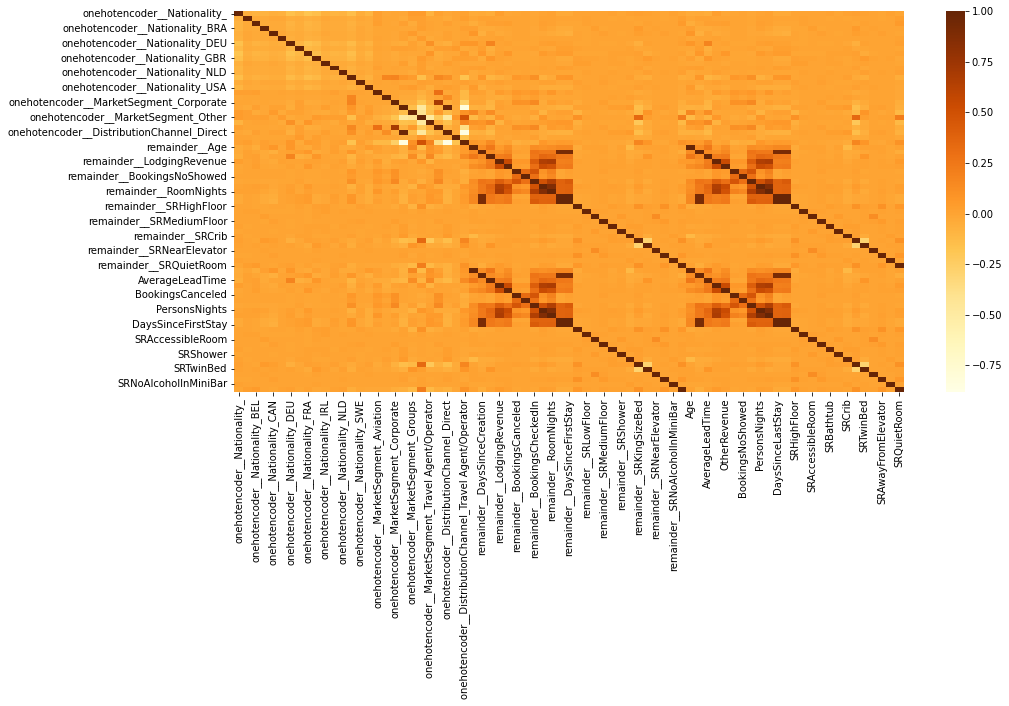

In [14]:
correlation = df2.corr().round(2)
plt.figure(figsize = (15,7))
sns.heatmap(correlation, annot = None, cmap = 'YlOrBr')
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2a2a2ad9;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>5.2 | Normalization  </b></p>
</div>. 

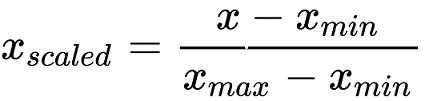

In [15]:
# Normalize Data
df_scaled = ((df2 - df2.min()) / (df2.min() + df2.max())) * 9 + 1

In [16]:
df_scaled.describe()

,onehotencoder__Nationality_,onehotencoder__Nationality_AUT,onehotencoder__Nationality_BEL,onehotencoder__Nationality_BRA,onehotencoder__Nationality_CAN,onehotencoder__Nationality_CHE,onehotencoder__Nationality_DEU,onehotencoder__Nationality_ESP,onehotencoder__Nationality_FRA,onehotencoder__Nationality_GBR,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,...,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000,79735.000000
mean,2.341055,1.167843,1.351828,1.326883,1.171907,1.237712,2.153797,1.552743,2.400652,1.976133,...,1.007901,1.026300,1.016028,1.117615,4.215439,2.291729,1.003160,1.032169,1.001129,1.818449
std,3.204870,1.217554,1.744336,1.683784,1.231921,1.443236,3.008827,2.160839,3.262541,2.798654,...,0.266550,0.485806,0.379470,1.022111,4.312787,3.155491,0.168626,0.537113,0.100784,2.587714
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# <b>6 <span style='color:#fff700ba'>|</span>KMeans</b>

> ## <b><span style='color:#666'>Initialize random centroids</span></b>

In [17]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) # Gets a random centroid from each column
        centroids.append(centroid)
        
    return pd.concat(centroids, axis = 1)

In [18]:
sample_centroids = random_centroids(df_scaled, 3) # get 3 samples of of centroids from each column
sample_centroids

,0,1,2
onehotencoder__Nationality_,1.0,1.0,1.0
onehotencoder__Nationality_AUT,1.0,1.0,1.0
onehotencoder__Nationality_BEL,1.0,1.0,1.0
onehotencoder__Nationality_BRA,1.0,1.0,1.0
onehotencoder__Nationality_CAN,1.0,1.0,1.0
...,...,...,...
SRTwinBed,1.0,1.0,1.0
SRNearElevator,1.0,1.0,1.0
SRAwayFromElevator,1.0,1.0,1.0
SRNoAlcoholInMiniBar,1.0,1.0,1.0


> ## <b><span style='color:#666'>Label each data point</span></b>

#### Calculate the distance between each data point and each centroid using eucliden distance equation
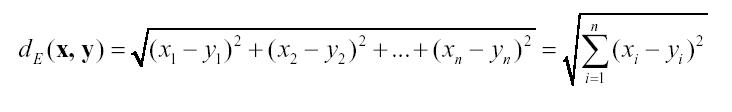

In [19]:
sample_centroids.apply(lambda x: np.sqrt((df_scaled - x)**2 ).sum(axis = 1)) # Calculate the distance

,0,1,2
0,89.398940,80.383123,55.254744
1,91.899036,69.715375,53.732430
2,105.429161,38.876288,52.707487
3,90.228933,48.004035,50.021090
4,85.087865,56.101009,51.604320
...,...,...,...
79730,67.872768,59.480210,46.768499
79731,71.316051,80.377221,67.215919
79732,67.872768,77.665777,64.954066
79733,93.483794,82.638304,68.302872


#### Let's convett it into a function, and label the points 

In [20]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt((data - x)**2 ).sum(axis = 1)) # Calculate the distance
    return distances.idxmin(axis = 1) # Label each point by getting the index of the leastest value (nearest point)

In [21]:
sample_labels = get_labels(df_scaled,sample_centroids)
sample_labels.value_counts()

2    66692
1    12102
0      941
dtype: int64

In [22]:
# Update values
def new_centroids(data, labels):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [23]:
from IPython.display import clear_output

In [24]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) # Reduce dimensonality for visualiztion
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    clear_output(wait = True) # Clear the output and then rewrite the board
    plt.figure(figsize = (12,7))
    plt.title('Iteration {}'.format(iteration))
    plt.scatter(x = data_2d[:, 0], y = data_2d[:, 1], c = labels )
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:, 1] )
    plt.show()

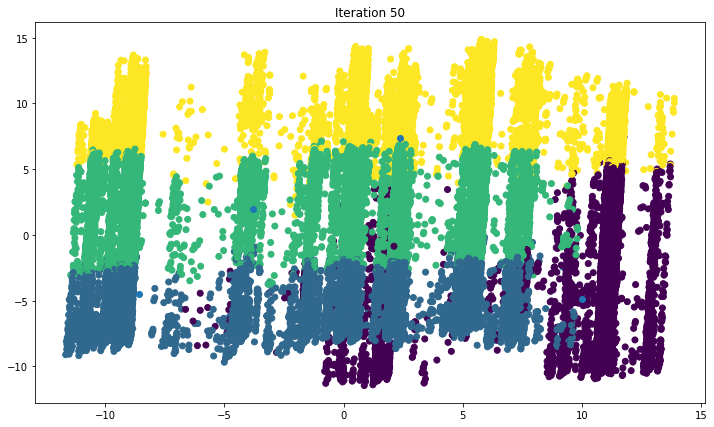

In [25]:
max_iteration = 100
k = 4
centroids = random_centroids(df_scaled, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iteration and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df_scaled, centroids)
    centroids = new_centroids(df_scaled, labels)
    plot_clusters(df_scaled, labels, centroids, iteration)
    iteration += 1

# <b>7 <span style='color:#fff700ba'>|</span> Clustring Analysis</b>

In [26]:
# Initalize Labels column
df['labels'] = labels

### Distrbution of ages for each label

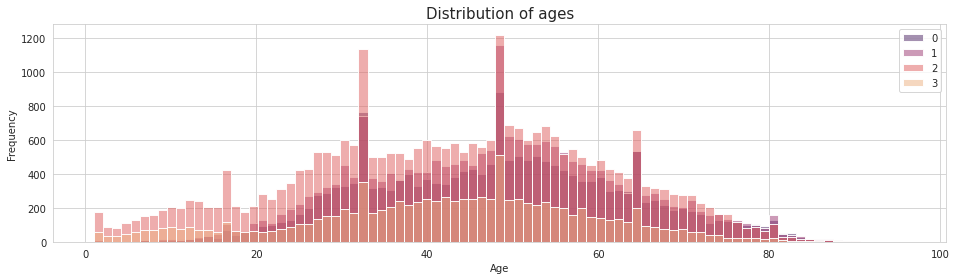

In [27]:
plt.figure(figsize = (16,4))
sns.set_style('whitegrid')
sns.histplot(data = df, x="Age", fill = True, color = '#41be78', hue = "labels",palette = 'flare' )
plt.title('Distribution of ages', fontsize = 15)
plt.xlabel('Age')
plt.legend(labels = [0,1,2,3])
plt.ylabel('Frequency')
plt.show()

### See the effect of the label column on each feature

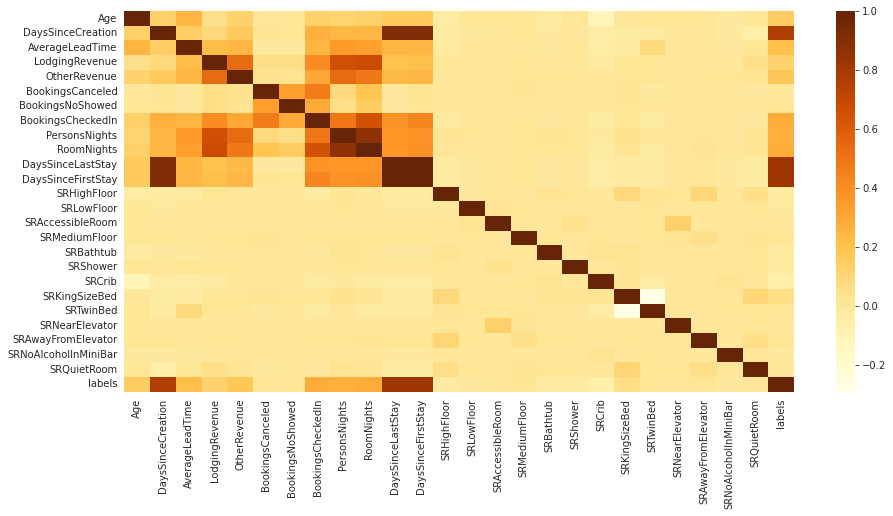

In [28]:
correlation = df.corr().round(2)
plt.figure(figsize = (15,7))
sns.heatmap(correlation, annot = None, cmap = 'YlOrBr')
plt.show()

In [29]:
df[labels == 3]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,labels
2,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,3
4,,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,3
6,FRA,32.0,1095,38,535.0,94.0,0,0,1,10,...,0,0,0,1,0,0,0,0,0,3
8,IRL,25.0,1095,96,174.0,69.0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,3
10,FRA,58.0,1095,60,292.0,81.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22898,GBR,60.0,647,1,312.0,26.0,0,0,1,3,...,0,0,0,1,0,0,0,0,0,3
22911,FRA,62.0,647,16,204.0,14.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,3
22916,,52.0,646,16,204.0,21.0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,3
22937,BEL,43.0,646,16,174.0,25.0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,3


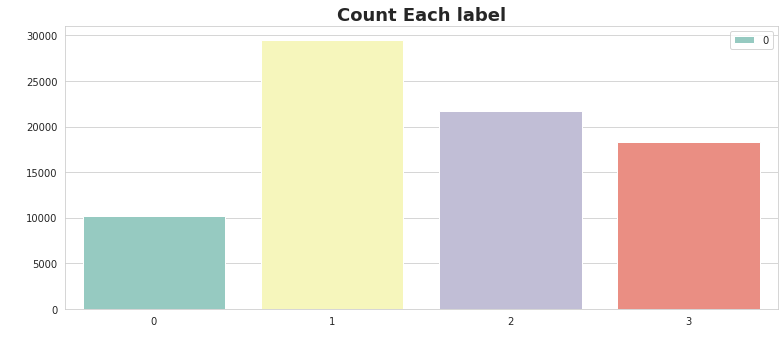

In [30]:
plt.figure(figsize = (11,5))
sns.set_style('whitegrid')

ax = sns.countplot(x='labels', dodge=False, data=df, palette="Set3")
ax.set_title('Count Each label', fontsize=18, fontweight='bold')
ax.set_xlabel('Label', fontsize=15, color='white')
ax.set_ylabel('count', fontsize=15, color='white')
ax.legend(labels = [0,1,2,3])
plt.tight_layout()
plt.show()